In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-classification-dataset/Diabetes Classification.csv


#  **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  **Load dataset**

In [4]:
data = pd.read_csv('/kaggle/input/diabetes-classification-dataset/Diabetes Classification.csv') 
print(data.head())

   Unnamed: 0  Age Gender  BMI  Chol   TG  HDL  LDL    Cr  BUN  Diagnosis
0           0   50      F   24   4.2  0.9  2.4  1.4  46.0  4.7          0
1           1   26      M   23   3.7  1.4  1.1  2.1  62.0  4.5          0
2           2   33      M   21   4.9  1.0  0.8  2.0  46.0  7.1          0
3           3   45      F   21   2.9  1.0  1.0  1.5  24.0  2.3          0
4           4   50      F   24   3.6  1.3  0.9  2.1  50.0  2.0          0


#  **Drop unwanted columns and change to relvant datatype**

In [5]:
data_new = data.drop(['Unnamed: 0'], axis=1)
data_new['BMI'] = data_new['BMI'].astype(float)

In [6]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5132 non-null   int64  
 1   Gender     5132 non-null   object 
 2   BMI        5132 non-null   float64
 3   Chol       5132 non-null   float64
 4   TG         5132 non-null   float64
 5   HDL        5132 non-null   float64
 6   LDL        5132 non-null   float64
 7   Cr         5132 non-null   float64
 8   BUN        5132 non-null   float64
 9   Diagnosis  5132 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 401.1+ KB


#  **Identify NULL Values**

In [8]:
data_new.isnull().sum()
#no null values

Age          0
Gender       0
BMI          0
Chol         0
TG           0
HDL          0
LDL          0
Cr           0
BUN          0
Diagnosis    0
dtype: int64

# **SUMMARY STATISTICS**

In [9]:
numerical_summary = data_new.describe()
print(numerical_summary)

               Age          BMI         Chol           TG          HDL  \
count  5132.000000  5132.000000  5132.000000  5132.000000  5132.000000   
mean     48.950312    24.613406     4.866882     1.719328     1.593305   
std      14.048794     4.277205     1.001052     1.327057     1.038849   
min      20.000000    15.000000     0.000000     0.000000     0.000000   
25%      36.000000    22.000000     4.190000     0.910000     1.090000   
50%      49.000000    24.000000     4.800000     1.380000     1.300000   
75%      59.000000    27.000000     5.460000     2.100000     1.590000   
max      93.000000    47.000000    11.650000    32.640000     9.900000   

               LDL           Cr          BUN    Diagnosis  
count  5132.000000  5132.000000  5132.000000  5132.000000  
mean      2.914121    71.144800     4.896969     0.388348  
std       0.945423    28.494394     1.689206     0.487422  
min       0.300000     4.860753     0.500000     0.000000  
25%       2.290000    58.000000  

In [10]:
numerical_mode = data_new.mode().iloc[0]
print(numerical_mode)

Age                55
Gender              M
BMI              23.0
Chol              4.0
TG                1.0
HDL          4.860753
LDL          4.860753
Cr               59.0
BUN          4.860753
Diagnosis           0
Name: 0, dtype: object


**categorical summary for gender**

In [11]:
# data_new['Gender'] = data_new['Gender'].replace('f', 'F')
categorical_summary = data_new['Gender'].value_counts()
print(categorical_summary)

Gender
M    3256
F    1875
f       1
Name: count, dtype: int64


In [13]:
# f=F so we will replace f with F
data_new['Gender'] = data_new['Gender'].replace('f', 'F')
categorical_summary = data_new['Gender'].value_counts()
print(categorical_summary)

Gender
M    3256
F    1876
Name: count, dtype: int64


# **Histogram**

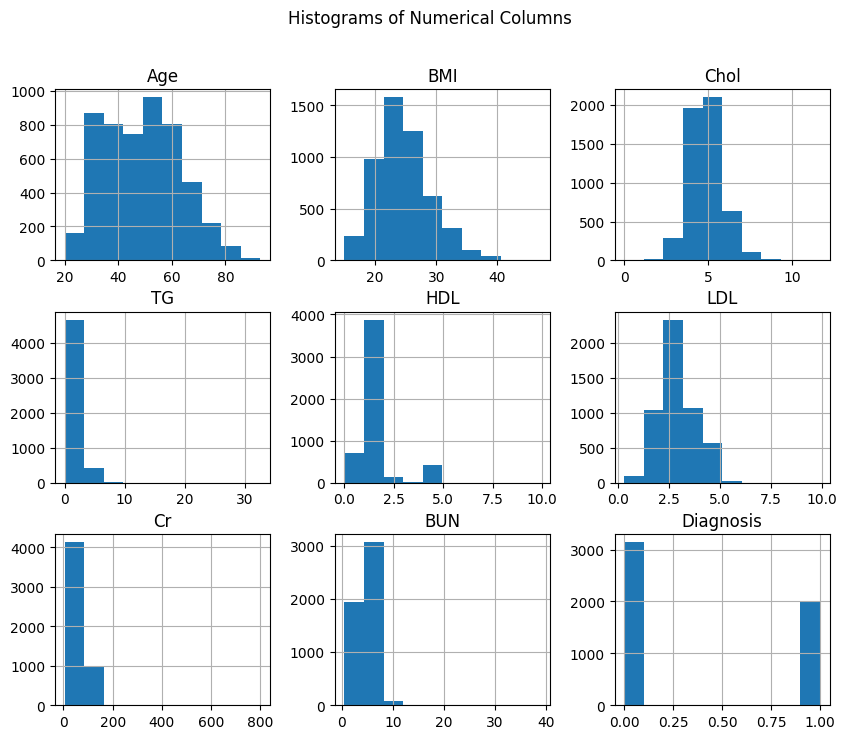

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
data_new.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# **Box Plot**

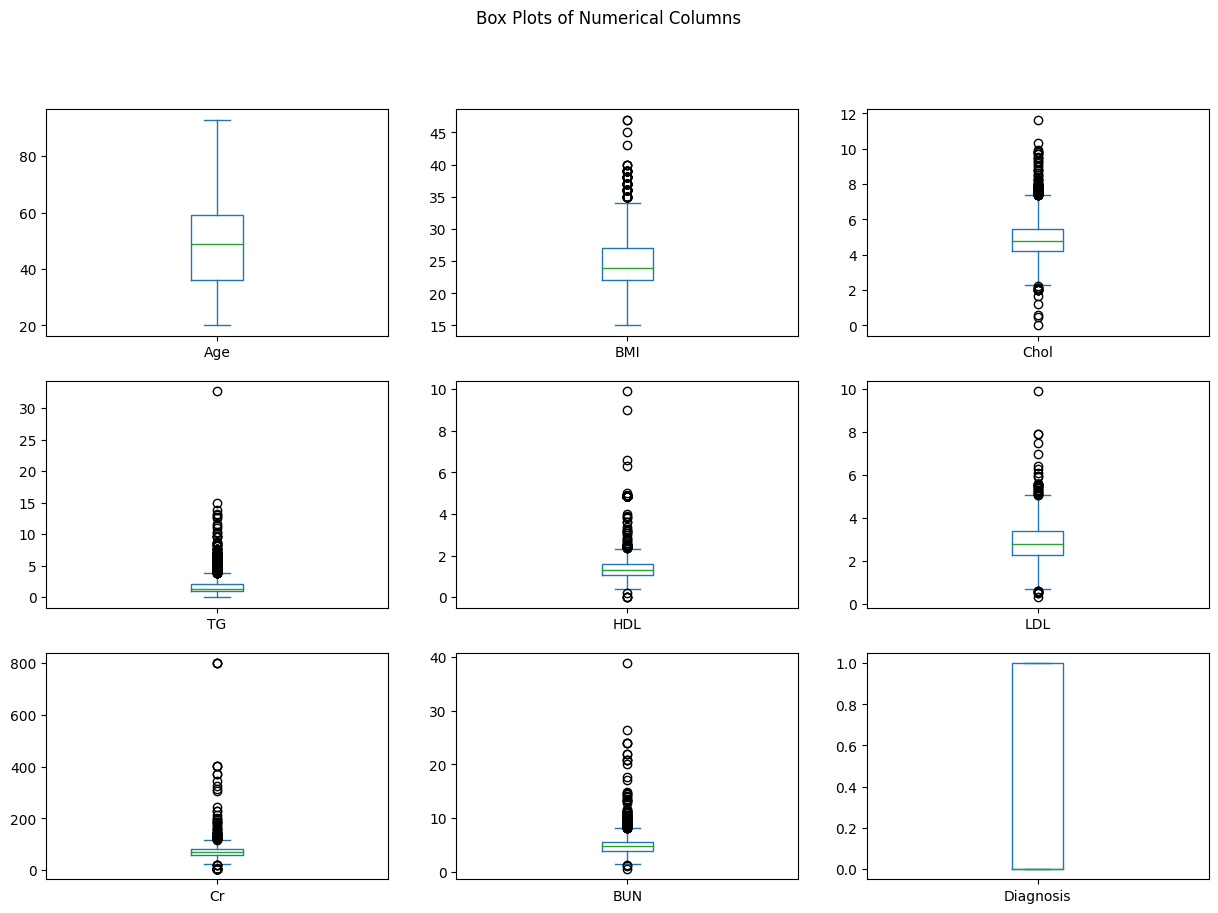

In [15]:
# Plot box plots for numerical columns
data_new.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))
plt.suptitle('Box Plots of Numerical Columns')
plt.show()


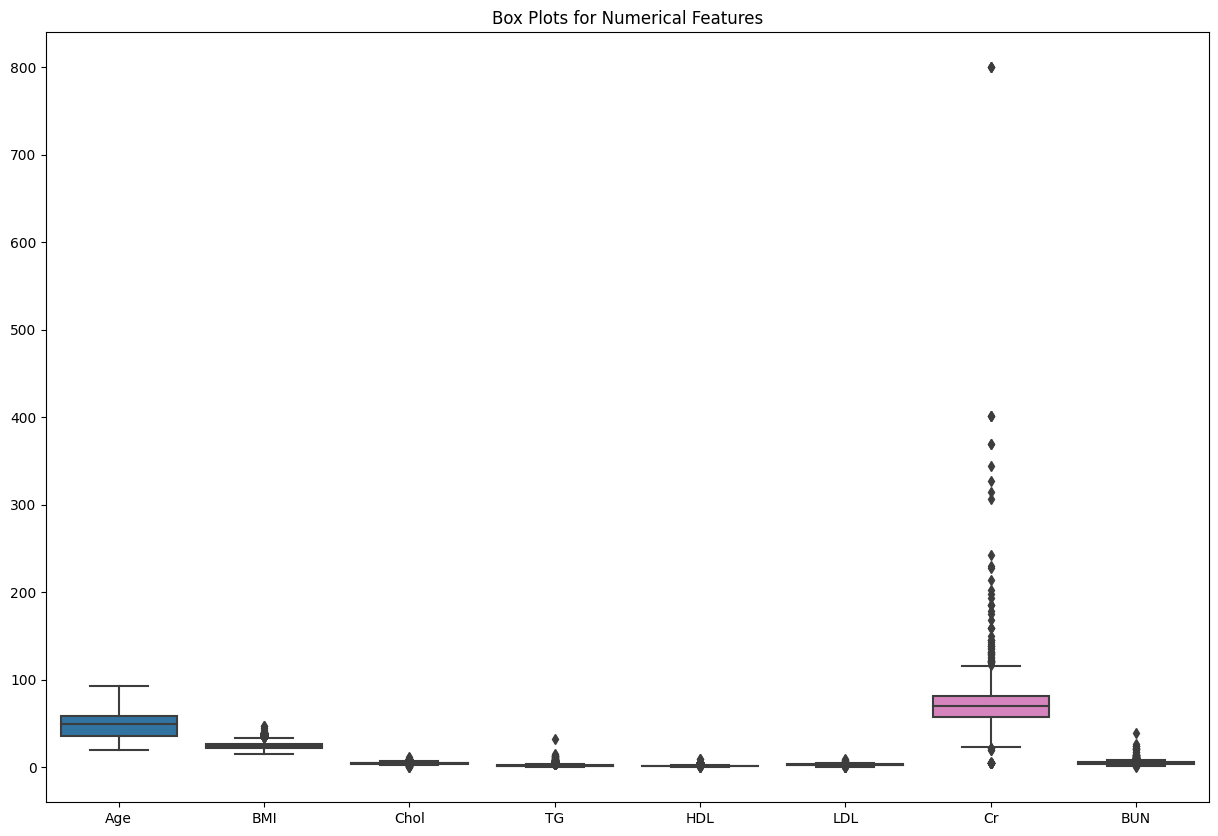

In [33]:
import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(15, 10))
sns.boxplot(data=datanew_encoded[['Age', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']])
plt.title('Box Plots for Numerical Features')
plt.show()


# **Gender Distribution**

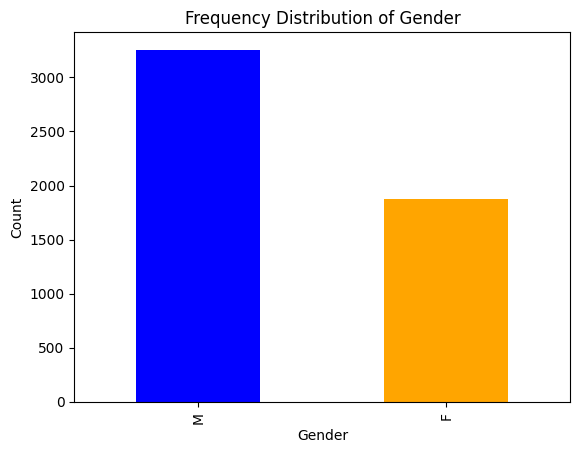

In [16]:
data_new['Gender'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Frequency Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# **Convert categorical data into numerical using one hot encoding**

In [21]:
datanew_encoded = pd.get_dummies(data_new, columns=['Gender'], drop_first=True)
print(datanew_encoded.head())

   Age   BMI  Chol   TG  HDL  LDL    Cr  BUN  Diagnosis  Gender_M
0   50  24.0   4.2  0.9  2.4  1.4  46.0  4.7          0     False
1   26  23.0   3.7  1.4  1.1  2.1  62.0  4.5          0      True
2   33  21.0   4.9  1.0  0.8  2.0  46.0  7.1          0      True
3   45  21.0   2.9  1.0  1.0  1.5  24.0  2.3          0     False
4   50  24.0   3.6  1.3  0.9  2.1  50.0  2.0          0     False


In [23]:
datanew_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5132 non-null   int64  
 1   BMI        5132 non-null   float64
 2   Chol       5132 non-null   float64
 3   TG         5132 non-null   float64
 4   HDL        5132 non-null   float64
 5   LDL        5132 non-null   float64
 6   Cr         5132 non-null   float64
 7   BUN        5132 non-null   float64
 8   Diagnosis  5132 non-null   int64  
 9   Gender_M   5132 non-null   bool   
dtypes: bool(1), float64(7), int64(2)
memory usage: 366.0 KB


# **Correlation Matrix**

Correlation Matrix:
                 Age       BMI      Chol        TG       HDL       LDL  \
Age        1.000000  0.277253  0.205584  0.184110  0.170291  0.224247   
BMI        0.277253  1.000000  0.122678  0.335229 -0.040569  0.034302   
Chol       0.205584  0.122678  1.000000  0.334218  0.101136  0.584852   
TG         0.184110  0.335229  0.334218  1.000000 -0.003750  0.089182   
HDL        0.170291 -0.040569  0.101136 -0.003750  1.000000  0.545143   
LDL        0.224247  0.034302  0.584852  0.089182  0.545143  1.000000   
Cr         0.018641  0.064428 -0.014875  0.057870 -0.077070 -0.015482   
BUN        0.208454  0.105718  0.069939  0.053870  0.016053  0.056640   
Diagnosis  0.524570  0.427543  0.131169  0.241759  0.309579  0.230578   
Gender_M  -0.010116  0.149077 -0.055736  0.116041 -0.064706  0.016910   

                 Cr       BUN  Diagnosis  Gender_M  
Age        0.018641  0.208454   0.524570 -0.010116  
BMI        0.064428  0.105718   0.427543  0.149077  
Chol      -0.014

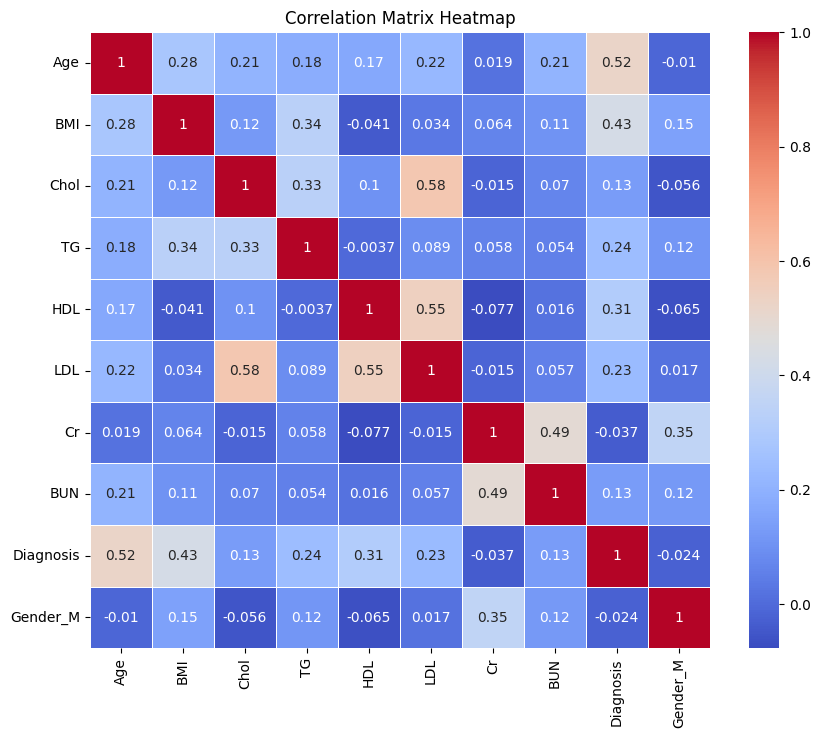

In [39]:
correlation_matrix = datanew_encoded.corr()
print("Correlation Matrix:\n", correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Pearson Correlation Matrix:
            Age       BMI      Chol        TG       HDL       LDL        Cr  \
Age   1.000000  0.277253  0.205584  0.184110  0.170291  0.224247  0.018641   
BMI   0.277253  1.000000  0.122678  0.335229 -0.040569  0.034302  0.064428   
Chol  0.205584  0.122678  1.000000  0.334218  0.101136  0.584852 -0.014875   
TG    0.184110  0.335229  0.334218  1.000000 -0.003750  0.089182  0.057870   
HDL   0.170291 -0.040569  0.101136 -0.003750  1.000000  0.545143 -0.077070   
LDL   0.224247  0.034302  0.584852  0.089182  0.545143  1.000000 -0.015482   
Cr    0.018641  0.064428 -0.014875  0.057870 -0.077070 -0.015482  1.000000   
BUN   0.208454  0.105718  0.069939  0.053870  0.016053  0.056640  0.489446   

           BUN  
Age   0.208454  
BMI   0.105718  
Chol  0.069939  
TG    0.053870  
HDL   0.016053  
LDL   0.056640  
Cr    0.489446  
BUN   1.000000  


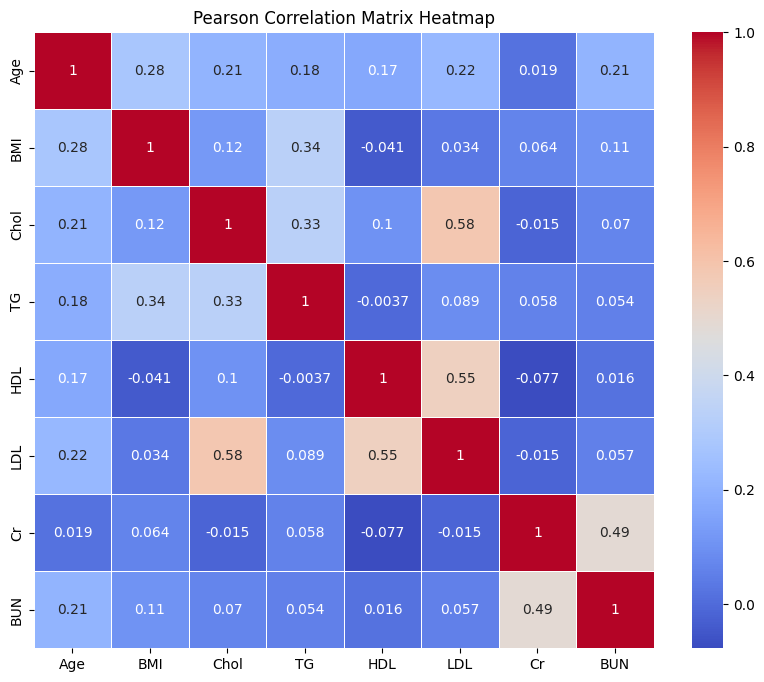

In [36]:
pearson_corr = datanew_encoded[['Age', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']].corr(method='pearson')
print("Pearson Correlation Matrix:\n", pearson_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Matrix Heatmap')
plt.show()

Spearman Correlation Matrix:
            Age       BMI      Chol        TG       HDL       LDL        Cr  \
Age   1.000000  0.319817  0.222570  0.291829  0.030071  0.216950 -0.024646   
BMI   0.319817  1.000000  0.139760  0.471177 -0.236076  0.070292  0.059641   
Chol  0.222570  0.139760  1.000000  0.358454  0.169486  0.680033 -0.013167   
TG    0.291829  0.471177  0.358454  1.000000 -0.266269  0.196794  0.084828   
HDL   0.030071 -0.236076  0.169486 -0.266269  1.000000  0.243916 -0.109991   
LDL   0.216950  0.070292  0.680033  0.196794  0.243916  1.000000  0.033018   
Cr   -0.024646  0.059641 -0.013167  0.084828 -0.109991  0.033018  1.000000   
BUN   0.235165  0.094245  0.095040  0.049042 -0.003484  0.111970  0.328148   

           BUN  
Age   0.235165  
BMI   0.094245  
Chol  0.095040  
TG    0.049042  
HDL  -0.003484  
LDL   0.111970  
Cr    0.328148  
BUN   1.000000  


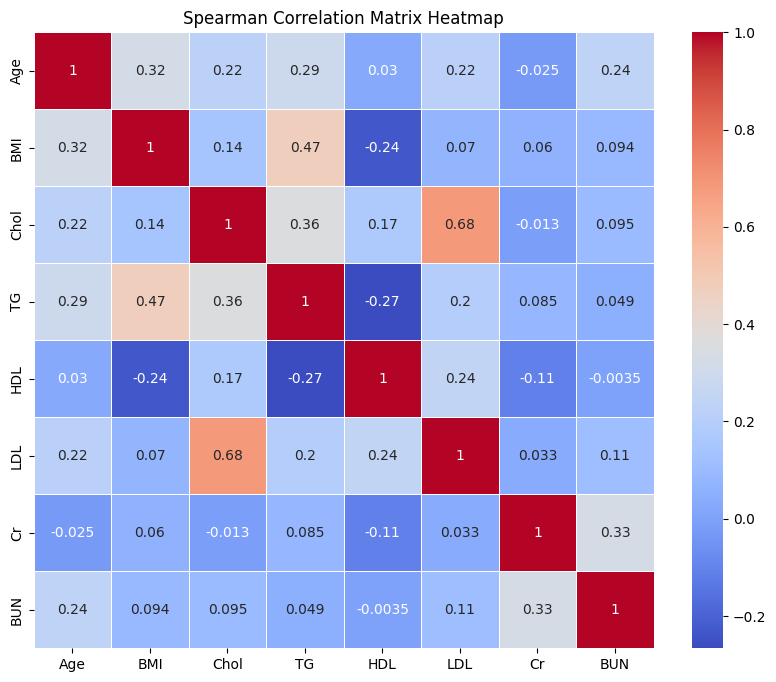

In [37]:
spearman_corr = datanew_encoded[['Age', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']].corr(method='spearman')
print("Spearman Correlation Matrix:\n", spearman_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

# **Pair Plots**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

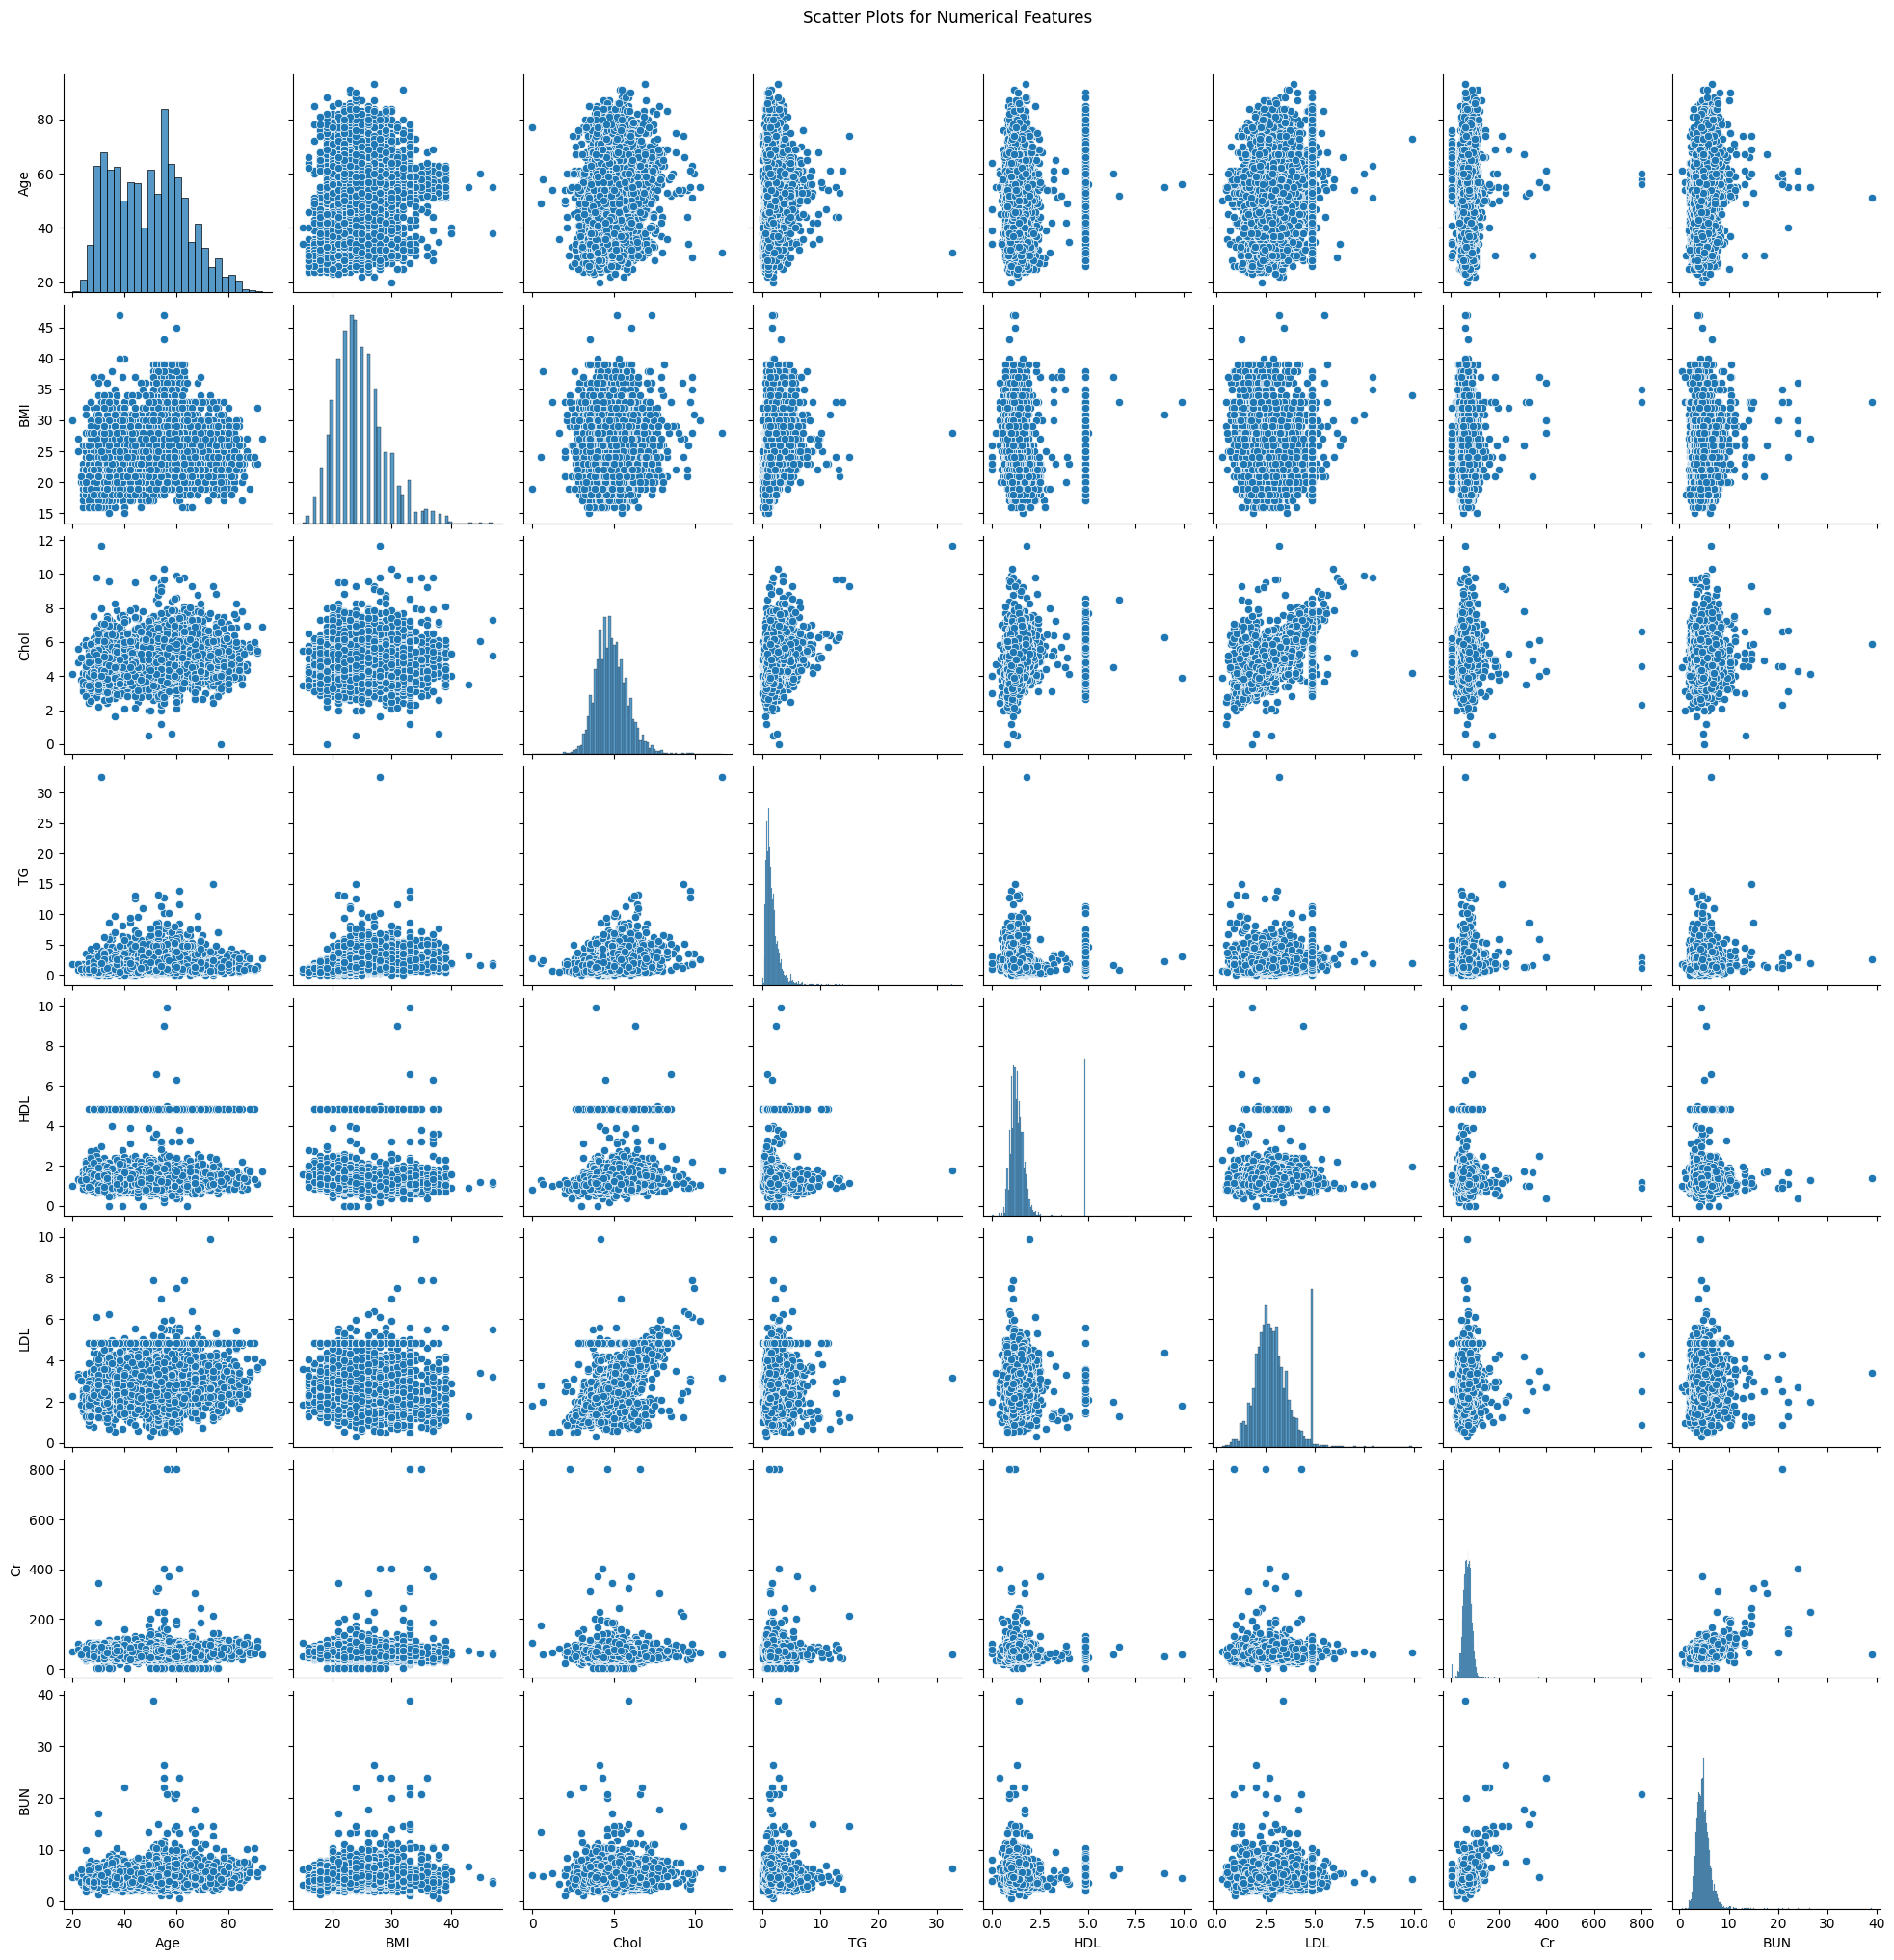

In [25]:
sns.pairplot(datanew_encoded[['Age', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']])
plt.suptitle('Scatter Plots for Numerical Features', y=1.02)
plt.show()

# **Outliers detection**

In [26]:
z_scores = np.abs(stats.zscore(datanew_encoded[['Age', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]))
outliers = (z_scores > 3).any(axis=1)
print("Number of outliers detected:", np.sum(outliers))

Number of outliers detected: 616


In [32]:
z_scores = np.abs(stats.zscore(datanew_encoded[['Age', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]))

# Find outliers in every column
outliers = pd.DataFrame(z_scores > 3, columns=['Age', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN'])

# Print sum of outliers in each column
sum_outliers_per_column = outliers.sum(axis=0)
print("Sum of outliers in each column:")
print(sum_outliers_per_column)

Sum of outliers in each column:
Age       1
BMI      50
Chol     44
TG       74
HDL     416
LDL      10
Cr       28
BUN      54
dtype: int64
